In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import RandomizedSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Basic packages
from scipy import stats; from scipy.stats import zscore, norm, randint
import matplotlib.style as style; style.use('fivethirtyeight')
#import plotly.express as px
%matplotlib inline

# Impute and Encode
from sklearn.preprocessing import LabelEncoder
#from impute.imputation.cs import mice

# Modelling - LR, KNN, NB, Metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier, VotingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score,roc_curve

# Oversampling
from imblearn.over_sampling import SMOTE

# Suppress warnings
import warnings; warnings.filterwarnings('ignore')

# Visualize Tree
from sklearn.tree import export_graphviz
from IPython.display import Image
from os import system

# Display settings
pd.options.display.max_rows = 10000
pd.options.display.max_columns = 10000

In [2]:


# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials
 
 
# # Authenticate and create the PyDrive client.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)
# link = 'https://drive.google.com/file/d/1D4z13rFbwe6ch0WwEiCO2dd5a18avot6/view?usp=sharing'
# link2 = 'https://drive.google.com/file/d/1qLbITeJToHCKtzG2HnvSZUn5v3LeW7lg/view?usp=sharing'
 
# import pandas as pd
 
# # to get the id part of the file
# id = link.split("/")[-2]
# id2 = link2.split("/")[-2]
 
# downloaded = drive.CreateFile({'id':id})
# downloaded.GetContentFile('Train_Set_TVS.csv') 
df_train = pd.read_csv("train_ctrUa4K.csv")
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df_train.shape

(614, 13)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [5]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
(df_train.isnull().sum()/len(df_train))*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

###### Inference :
    
    As the dataset has highest missing values as 8% so we can drop the null values or impute the null values.
    
    Imputing of the data without loosing a data , this can give the result in rare case scenario.

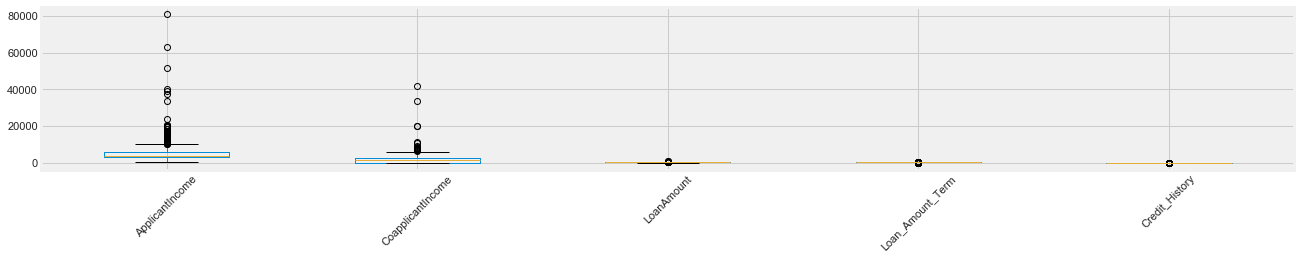

In [8]:
df_train.boxplot(figsize=(20,3))
plt.xticks(rotation=45)
plt.show()

In [9]:
# df_train_copy1 = df_train_copy1.drop(columns=['ID'], axis=1)
df_train = df_train.drop(columns=['Loan_ID'], axis=1)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 57.6+ KB


In [10]:
for column in df_train.columns:
    if df_train[column].dtype == 'object':
        print("Unique values in ",column.upper(),'is : ',df_train[column].nunique())
        print(df_train[column].value_counts().sort_values())
        print('\n')

Unique values in  GENDER is :  2
Female    112
Male      489
Name: Gender, dtype: int64


Unique values in  MARRIED is :  2
No     213
Yes    398
Name: Married, dtype: int64


Unique values in  DEPENDENTS is :  4
3+     51
2     101
1     102
0     345
Name: Dependents, dtype: int64


Unique values in  EDUCATION is :  2
Not Graduate    134
Graduate        480
Name: Education, dtype: int64


Unique values in  SELF_EMPLOYED is :  2
Yes     82
No     500
Name: Self_Employed, dtype: int64


Unique values in  PROPERTY_AREA is :  3
Rural        179
Urban        202
Semiurban    233
Name: Property_Area, dtype: int64


Unique values in  LOAN_STATUS is :  2
N    192
Y    422
Name: Loan_Status, dtype: int64




In [11]:
df_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

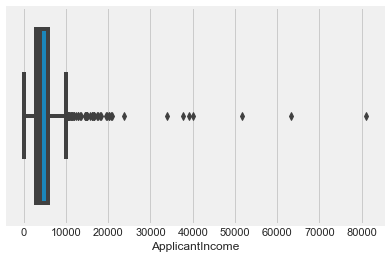

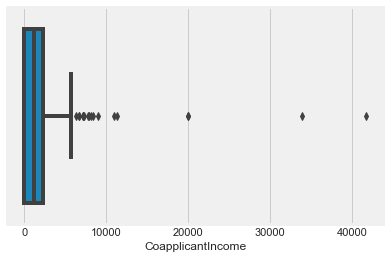

In [12]:
splot_cols=df_train.columns
for i in splot_cols:
    if df_train[i].dtype != 'object' and df_train[i].isnull().values.any() != True:
        sns.boxplot(df_train[i])
        plt.show()

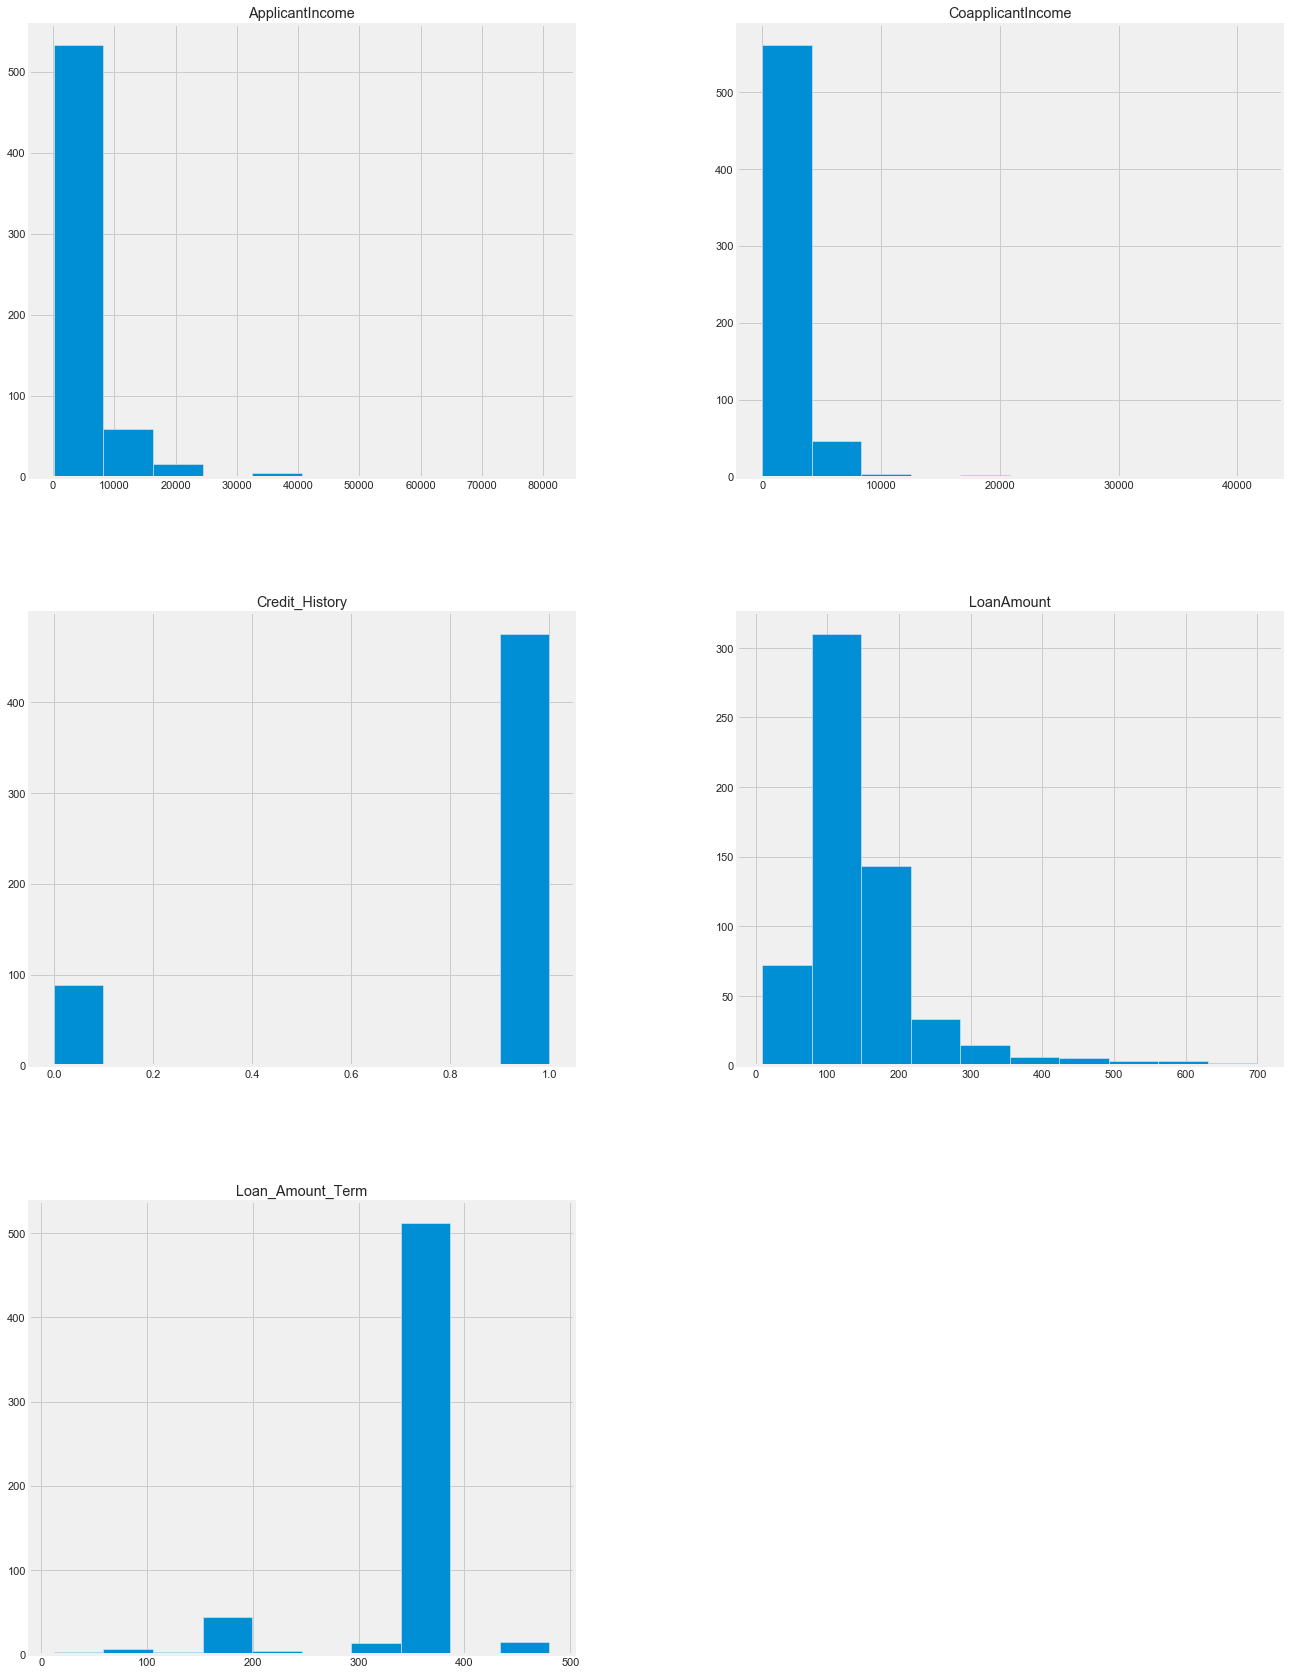

In [13]:
df_train.hist(figsize=(20,30));

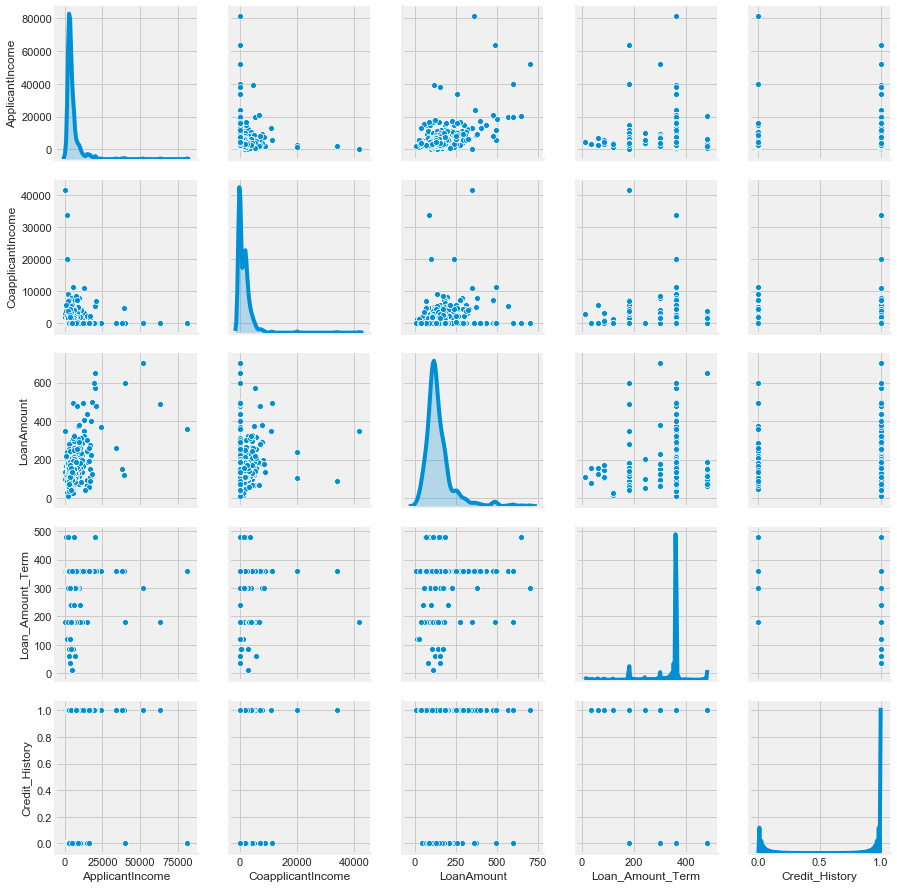

In [14]:
sns.pairplot(df_train,diag_kind='kde',palette="tab10")

In [15]:
df_train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


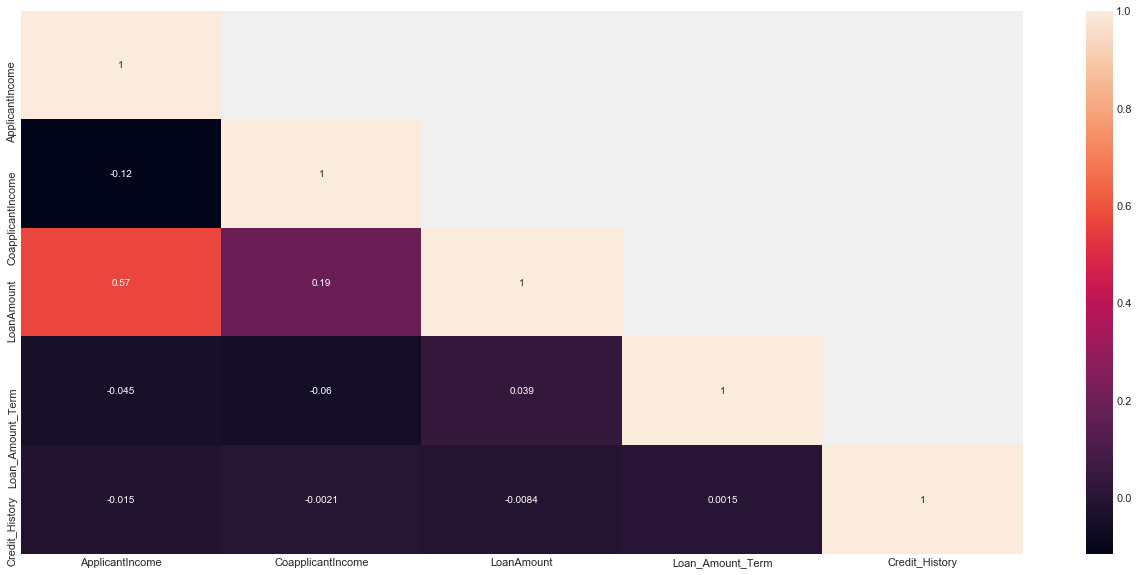

In [16]:
plt.figure(figsize=(20,10)) 
sns.heatmap(df_train.corr(), annot=True,mask=np.triu(df_train.corr(),+1))

### Treating Null values

In [17]:
df_train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
for column in df_train.columns:
    if df_train[column].dtype != 'object':
        median = df_train[column].median()
        df_train[column] = df_train[column].fillna(median)    
        
df_train.isnull().sum() 

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
for column in df_train:
    if df_train[column].dtype == 'object':
        if df_train[column].isnull().any():
#             if(column in cateogry_columns):
                df_train[column]=df_train[column].fillna(df_train[column].mode()[0])
df_train.isnull().sum() 

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [20]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [21]:
df_cat_train = df_train.select_dtypes(include = ['object'])
df_num_train = df_train.select_dtypes(include = ['float64','int64'])

In [22]:
df_cat_train = pd.get_dummies(df_cat_train, drop_first = True)
df_cat_train.head()

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,1,0,0,0,0,0,0,0,1,1
1,1,1,1,0,0,0,0,0,0,0
2,1,1,0,0,0,0,1,0,1,1
3,1,1,0,0,0,1,0,0,1,1
4,1,0,0,0,0,0,0,0,1,1


In [23]:
df_train_copy1 = pd.concat([df_cat_train,df_num_train],axis=1)
df_train_copy1.head()

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,0,0,0,1,1,5849,0.0,128.0,360.0,1.0
1,1,1,1,0,0,0,0,0,0,0,4583,1508.0,128.0,360.0,1.0
2,1,1,0,0,0,0,1,0,1,1,3000,0.0,66.0,360.0,1.0
3,1,1,0,0,0,1,0,0,1,1,2583,2358.0,120.0,360.0,1.0
4,1,0,0,0,0,0,0,0,1,1,6000,0.0,141.0,360.0,1.0


In [167]:
x = df_train_copy1.drop('Loan_Status_Y', axis=1)
y = df_train_copy1['Loan_Status_Y']

In [25]:
x.head()

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,0,0,0,1,5849,0.0,128.0,360.0,1.0
1,1,1,1,0,0,0,0,0,0,4583,1508.0,128.0,360.0,1.0
2,1,1,0,0,0,0,1,0,1,3000,0.0,66.0,360.0,1.0
3,1,1,0,0,0,1,0,0,1,2583,2358.0,120.0,360.0,1.0
4,1,0,0,0,0,0,0,0,1,6000,0.0,141.0,360.0,1.0


In [26]:
# from scipy.stats import zscore
# x = x.apply(zscore)
# # train_scaled = pd.concat([df_cat_train,df_num_train],axis=1)
# x.head()
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(x.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=[x.columns])
df_scaled.head()

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.070489,0.000000,0.172214,0.74359,1.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.030093,0.056592,0.160637,0.74359,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.072356,0.000000,0.191027,0.74359,1.0


In [27]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
(Gender_Male,)                614 non-null float64
(Married_Yes,)                614 non-null float64
(Dependents_1,)               614 non-null float64
(Dependents_2,)               614 non-null float64
(Dependents_3+,)              614 non-null float64
(Education_Not Graduate,)     614 non-null float64
(Self_Employed_Yes,)          614 non-null float64
(Property_Area_Semiurban,)    614 non-null float64
(Property_Area_Urban,)        614 non-null float64
(ApplicantIncome,)            614 non-null float64
(CoapplicantIncome,)          614 non-null float64
(LoanAmount,)                 614 non-null float64
(Loan_Amount_Term,)           614 non-null float64
(Credit_History,)             614 non-null float64
dtypes: float64(14)
memory usage: 67.2 KB


In [28]:
x_train, x_test, y_train, y_test = train_test_split(df_scaled, y, test_size=0.2 , random_state=42,stratify=y)
x_train.shape

(491, 14)

In [29]:
y_train.shape

(491,)

In [30]:
x_test.shape

(123, 14)

In [169]:
y_test.shape

(123,)

### Logistic Regression

In [142]:
model_LR = LogisticRegression(n_jobs=-1)
model_LR.fit(x_train, y_train)

LogisticRegression(n_jobs=-1)

In [143]:
ytrain_predict = model_LR.predict(x_train)
ytrain_predict

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [144]:
ytrain_predict = model_LR.predict(x_train)
ytrain_predict

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [145]:
ytest_predict = model_LR.predict(x_test)
ytest_predict

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0], dtype=uint8)

In [146]:
Logistic_regression_wgs = model_LR.score(x_test, y_test)
Logistic_regression_wgs

0.8536585365853658

In [147]:
print(classification_report(y_train, ytrain_predict),'\n')

              precision    recall  f1-score   support

           0       0.91      0.40      0.55       154
           1       0.78      0.98      0.87       337

    accuracy                           0.80       491
   macro avg       0.85      0.69      0.71       491
weighted avg       0.82      0.80      0.77       491
 



In [148]:
print(classification_report(y_test, ytest_predict),'\n')

              precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123
 



### Logistic Regression with grid search cv

In [39]:
grid2={'penalty':['l1','l2','none'],
      'solver':[ 'lbfgs','liblinear'],
      'tol':[0.0001,0.00001]}

In [40]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=100000,n_jobs=2)

In [41]:
grid_search_LR = RandomizedSearchCV(estimator = model, param_distributions = grid2, cv = 3,n_jobs=-1,scoring='f1')
grid_search_LR.fit(x_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=LogisticRegression(max_iter=100000, n_jobs=2),
                   n_jobs=-1,
                   param_distributions={'penalty': ['l1', 'l2', 'none'],
                                        'solver': ['lbfgs', 'liblinear'],
                                        'tol': [0.0001, 1e-05]},
                   scoring='f1')

In [42]:
grid_search_LR.best_params_

{'tol': 1e-05, 'solver': 'lbfgs', 'penalty': 'l2'}

In [43]:
best_model = grid_search_LR.best_estimator_
best_model

LogisticRegression(max_iter=100000, n_jobs=2, tol=1e-05)

In [44]:
ytrain_predict = best_model.predict(x_train)
ytrain_predict

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [45]:
ytest_predict = best_model.predict(x_test)
ytest_predict

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0], dtype=uint8)

In [46]:
Logistic_regression = grid_search_LR.score(x_test, y_test)
Logistic_regression

0.903225806451613

In [47]:
print(classification_report(y_train, ytrain_predict),'\n')

              precision    recall  f1-score   support

           0       0.91      0.40      0.55       154
           1       0.78      0.98      0.87       337

    accuracy                           0.80       491
   macro avg       0.85      0.69      0.71       491
weighted avg       0.82      0.80      0.77       491
 



In [48]:
print(classification_report(y_test, ytest_predict),'\n')

              precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123
 



In [49]:
lr_metrics=classification_report(y_test, ytest_predict,output_dict=True)
lr_metrics1=classification_report(y_train, ytrain_predict,output_dict=True)

dftra=pd.DataFrame(lr_metrics).transpose()
dftra1=pd.DataFrame(lr_metrics1).transpose()
lr_test_f1=round(dftra.loc["1"][0],2)
lr_train_f1=round(dftra1.loc["1"][0],2)
print ('lr_test_f1 ',lr_test_f1)
print ('lr_train_f1 ',lr_train_f1)

lr_test_f1  0.9
lr_train_f1  0.87


### Random Forest

In [50]:
rfcl_wgs = RandomForestClassifier(random_state=42) 
rfcl_wgs = rfcl_wgs.fit(x_train, y_train)

In [51]:
ytrain_predict = rfcl_wgs.predict(x_train)
ytrain_predict

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,

In [52]:
ytest_predict = rfcl_wgs.predict(x_test)
ytest_predict

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0], dtype=uint8)

In [53]:
print(classification_report(y_train, ytrain_predict),'\n')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       154
           1       1.00      1.00      1.00       337

    accuracy                           1.00       491
   macro avg       1.00      1.00      1.00       491
weighted avg       1.00      1.00      1.00       491
 



In [54]:
print(classification_report(y_test, ytest_predict),'\n')

              precision    recall  f1-score   support

           0       0.78      0.66      0.71        38
           1       0.86      0.92      0.89        85

    accuracy                           0.84       123
   macro avg       0.82      0.79      0.80       123
weighted avg       0.83      0.84      0.83       123
 



### Random Forest with grid search cv

In [55]:
param_grid_RF = {'max_depth': [20, 40, 60, 80],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [100,150, 200]}

In [56]:
rfcl = RandomForestClassifier(random_state=42)

rfcl = RandomizedSearchCV(estimator = rfcl, param_distributions = param_grid_RF, cv = 3) 
rfcl = rfcl.fit(x_train, y_train)

In [57]:
rfcl.best_params_

{'n_estimators': 150,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 60}

In [58]:
rfcl = rfcl.best_estimator_

In [59]:
ytrain_predict = rfcl.predict(x_train)
ytrain_predict

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,

In [60]:
ytest_predict = rfcl.predict(x_test)
ytest_predict

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0], dtype=uint8)

In [61]:
print(classification_report(y_train, ytrain_predict),'\n')

              precision    recall  f1-score   support

           0       0.92      0.43      0.58       154
           1       0.79      0.98      0.88       337

    accuracy                           0.81       491
   macro avg       0.85      0.71      0.73       491
weighted avg       0.83      0.81      0.78       491
 



In [62]:
print(classification_report(y_test, ytest_predict),'\n')

              precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123
 



In [63]:
rf_metrics=classification_report(y_test, ytest_predict,output_dict=True)
rf_metrics1=classification_report(y_train, ytrain_predict,output_dict=True)
dftrf=pd.DataFrame(rf_metrics).transpose()
dftrf1=pd.DataFrame(rf_metrics1).transpose()
rf_test_f1=round(dftrf.loc["1"][0],2)
rf_train_f1=round(dftrf1.loc["1"][0],2)
print ('rf_test_f1 ',rf_test_f1)
print ('rf_train_f1 ',rf_train_f1)

rf_test_f1  0.9
rf_train_f1  0.88


### Decision Tree classifier

In [64]:
dt_class = DecisionTreeClassifier(random_state=1024)
dt_class.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1024)

In [65]:
ytrain_predict = dt_class.predict(x_train)
ytrain_predict

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,

In [66]:
ytest_predict = dt_class.predict(x_test)
ytest_predict

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0], dtype=uint8)

In [67]:
print(classification_report(y_train, ytrain_predict),'\n')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       154
           1       1.00      1.00      1.00       337

    accuracy                           1.00       491
   macro avg       1.00      1.00      1.00       491
weighted avg       1.00      1.00      1.00       491
 



In [68]:
print(classification_report(y_test, ytest_predict),'\n')

              precision    recall  f1-score   support

           0       0.55      0.61      0.57        38
           1       0.81      0.78      0.80        85

    accuracy                           0.72       123
   macro avg       0.68      0.69      0.69       123
weighted avg       0.73      0.72      0.73       123
 



### Decision Tree classifier with grid search cv

In [69]:
from sklearn.tree import DecisionTreeClassifier
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = RandomizedSearchCV(estimator=tree_clas, param_distributions=param_grid, cv=5, verbose=True)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
                   param_distributions={'ccp_alpha': [0.1, 0.01, 0.001],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 6, 7, 8, 9],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2']},
                   verbose=True)

In [70]:
grid_search.best_params_

{'max_features': 'log2',
 'max_depth': 9,
 'criterion': 'entropy',
 'ccp_alpha': 0.1}

In [71]:
grid_search = grid_search.best_estimator_

In [72]:
ytrain_predict = grid_search.predict(x_train)
ytrain_predict

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [73]:
ytest_predict = grid_search.predict(x_test)
ytest_predict

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0], dtype=uint8)

In [74]:
print(classification_report(y_train, ytrain_predict),'\n')

              precision    recall  f1-score   support

           0       0.91      0.40      0.55       154
           1       0.78      0.98      0.87       337

    accuracy                           0.80       491
   macro avg       0.85      0.69      0.71       491
weighted avg       0.82      0.80      0.77       491
 



In [75]:
print(classification_report(y_test, ytest_predict),'\n')

              precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123
 



In [76]:
dt_metrics=classification_report(y_test, ytest_predict,output_dict=True)
dt_metrics1=classification_report(y_train, ytrain_predict,output_dict=True)
dt=pd.DataFrame(dt_metrics).transpose()
dt1=pd.DataFrame(dt_metrics1).transpose()
dt_test_f1=round(dt.loc["1"][0],2)
dt_train_f1=round(dt1.loc["1"][0],2)
print ('dt_test_f1 ',dt_test_f1)
print ('dt_train_f1 ',dt_train_f1)

dt_test_f1  0.9
dt_train_f1  0.87


### LDA

In [77]:
LDA_wgs = LinearDiscriminantAnalysis()
LDA_wgs.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [78]:
ytrain_predict = LDA_wgs.predict(x_train)
ytrain_predict

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [79]:
ytest_predict = LDA_wgs.predict(x_test)
ytest_predict

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0], dtype=uint8)

In [80]:
print(classification_report(y_train, ytrain_predict),'\n')

              precision    recall  f1-score   support

           0       0.91      0.40      0.56       154
           1       0.78      0.98      0.87       337

    accuracy                           0.80       491
   macro avg       0.85      0.69      0.71       491
weighted avg       0.82      0.80      0.77       491
 



In [81]:
print(classification_report(y_test, ytest_predict),'\n')

              precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123
 



### LDA with grid search cv

In [82]:
param_grid = {'solver': ['svd', 'lsqr', 'eigen'],
              'shrinkage': [0.1, .01, .001],
#               'n_components' : [10,15,20,25,30,35],
              'tol' :[0.001,0.0001,0.00001]
             }
tree_clas = LinearDiscriminantAnalysis()
LDA_search = RandomizedSearchCV(estimator=tree_clas, param_distributions=param_grid, cv=5, verbose=True)
LDA_search.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LinearDiscriminantAnalysis(),
                   param_distributions={'shrinkage': [0.1, 0.01, 0.001],
                                        'solver': ['svd', 'lsqr', 'eigen'],
                                        'tol': [0.001, 0.0001, 1e-05]},
                   verbose=True)

In [83]:
LDA_search.best_params_

{'tol': 1e-05, 'solver': 'lsqr', 'shrinkage': 0.01}

In [84]:
LDA_search = LDA_search.best_estimator_

In [85]:
ytrain_predict = LDA_search.predict(x_train)
ytrain_predict

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [86]:
ytest_predict = LDA_search.predict(x_test)
ytest_predict

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0], dtype=uint8)

In [87]:
print(classification_report(y_train, ytrain_predict),'\n')

              precision    recall  f1-score   support

           0       0.91      0.40      0.56       154
           1       0.78      0.98      0.87       337

    accuracy                           0.80       491
   macro avg       0.85      0.69      0.71       491
weighted avg       0.82      0.80      0.77       491
 



In [88]:
print(classification_report(y_test, ytest_predict),'\n')

              precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123
 



In [89]:
lda_metrics=classification_report(y_test, ytest_predict,output_dict=True)
lda_metrics1=classification_report(y_train, ytrain_predict,output_dict=True)
lda=pd.DataFrame(lda_metrics).transpose()
lda1=pd.DataFrame(lda_metrics1).transpose()
lda_test_f1=round(lda.loc["1"][0],2)
lda_train_f1=round(lda1.loc["1"][0],2)
print ('lda_test_f1 ',lda_test_f1)
print ('lda_train_f1 ',lda_train_f1)

lda_test_f1  0.91
lda_train_f1  0.87


### Artificial Neural Network

In [90]:
from sklearn.neural_network import MLPClassifier
ANN_wgs = MLPClassifier(random_state=42)
ANN_wgs.fit(x_train, y_train)

MLPClassifier(random_state=42)

In [91]:
ytrain_predict = ANN_wgs.predict(x_train)
ytrain_predict

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [92]:
ytest_predict = ANN_wgs.predict(x_test)
ytest_predict

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0], dtype=uint8)

In [93]:
print(classification_report(y_train, ytrain_predict),'\n')

              precision    recall  f1-score   support

           0       0.91      0.42      0.57       154
           1       0.79      0.98      0.87       337

    accuracy                           0.80       491
   macro avg       0.85      0.70      0.72       491
weighted avg       0.83      0.80      0.78       491
 



In [94]:
print(classification_report(y_test, ytest_predict),'\n')

              precision    recall  f1-score   support

           0       0.92      0.58      0.71        38
           1       0.84      0.98      0.90        85

    accuracy                           0.85       123
   macro avg       0.88      0.78      0.81       123
weighted avg       0.86      0.85      0.84       123
 



### Artificial Neural Network with grid search cv

In [95]:
param_grid_ANN = { 'hidden_layer_sizes': [97,99,102,105],
                  'activation': [ 'relu'], 
                  'max_iter': [12500], 
                  'solver': ['adam'], 
                  'tol': [0.00001], }
ANN = MLPClassifier(random_state=42)


In [96]:
grid_search_ANN = GridSearchCV(estimator = ANN, param_grid = param_grid_ANN, cv = 3)
grid_search_ANN.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=MLPClassifier(random_state=42),
             param_grid={'activation': ['relu'],
                         'hidden_layer_sizes': [97, 99, 102, 105],
                         'max_iter': [12500], 'solver': ['adam'],
                         'tol': [1e-05]})

In [97]:
grid_search_ANN.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': 99,
 'max_iter': 12500,
 'solver': 'adam',
 'tol': 1e-05}

In [98]:
best_grid_ANN = grid_search_ANN.best_estimator_
best_grid_ANN

MLPClassifier(hidden_layer_sizes=99, max_iter=12500, random_state=42, tol=1e-05)

In [99]:
ytrain_predict = best_grid_ANN.predict(x_train)
ytrain_predict

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,

In [100]:
ytest_predict = best_grid_ANN.predict(x_test)
ytest_predict

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0], dtype=uint8)

In [101]:
print(classification_report(y_train, ytrain_predict),'\n')

              precision    recall  f1-score   support

           0       0.95      0.71      0.81       154
           1       0.88      0.98      0.93       337

    accuracy                           0.90       491
   macro avg       0.92      0.85      0.87       491
weighted avg       0.90      0.90      0.89       491
 



In [102]:
print(classification_report(y_test, ytest_predict),'\n')

              precision    recall  f1-score   support

           0       0.75      0.55      0.64        38
           1       0.82      0.92      0.87        85

    accuracy                           0.80       123
   macro avg       0.79      0.74      0.75       123
weighted avg       0.80      0.80      0.80       123
 



In [103]:
ANN_metrics=classification_report(y_test, ytest_predict,output_dict=True)
ANN_metrics1=classification_report(y_train, ytrain_predict,output_dict=True)
ANN=pd.DataFrame(ANN_metrics).transpose()
ANN1=pd.DataFrame(ANN_metrics1).transpose()
ANN_test_f1=round(ANN.loc["1"][0],2)
ANN_train_f1=round(ANN1.loc["1"][0],2)
print ('ANN_test_f1 ',ANN_test_f1)
print ('ANN_train_f1 ',ANN_train_f1)

ANN_test_f1  0.87
ANN_train_f1  0.93


### Gausian Naive bayes

In [104]:
gnb_wgs = GaussianNB()
gnb_wgs.fit(x_train, y_train)

GaussianNB()

In [105]:
train_predict_NNH = gnb_wgs.predict(x_train)
train_predict_NNH

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,

In [106]:
test_predict_NNH = gnb_wgs.predict(x_test)
test_predict_NNH

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0], dtype=uint8)

In [107]:
print(classification_report(y_train, train_predict_NNH),'\n')

              precision    recall  f1-score   support

           0       0.80      0.42      0.55       154
           1       0.78      0.95      0.86       337

    accuracy                           0.79       491
   macro avg       0.79      0.69      0.71       491
weighted avg       0.79      0.79      0.76       491
 



In [108]:
print(classification_report(y_test, test_predict_NNH),'\n')

              precision    recall  f1-score   support

           0       0.88      0.58      0.70        38
           1       0.84      0.96      0.90        85

    accuracy                           0.85       123
   macro avg       0.86      0.77      0.80       123
weighted avg       0.85      0.85      0.84       123
 



### KNN

In [109]:
NNH_wgs = KNeighborsClassifier(n_jobs=-1)
NNH_wgs.fit(x_train, y_train)

KNeighborsClassifier(n_jobs=-1)

In [110]:
train_predict_NNH = NNH_wgs.predict(x_train)
train_predict_NNH

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,

In [111]:
test_predict_NNH = NNH_wgs.predict(x_test)
test_predict_NNH

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0], dtype=uint8)

In [112]:
print(classification_report(y_train, train_predict_NNH),'\n')

              precision    recall  f1-score   support

           0       0.85      0.44      0.58       154
           1       0.79      0.96      0.87       337

    accuracy                           0.80       491
   macro avg       0.82      0.70      0.73       491
weighted avg       0.81      0.80      0.78       491
 



In [113]:
print(classification_report(y_test, test_predict_NNH),'\n')

              precision    recall  f1-score   support

           0       0.87      0.53      0.66        38
           1       0.82      0.96      0.89        85

    accuracy                           0.83       123
   macro avg       0.84      0.75      0.77       123
weighted avg       0.84      0.83      0.82       123
 



In [114]:
 
# downloaded = drive.CreateFile({'id':id2})
# downloaded.GetContentFile('Test_Set_TVS.csv') 
df_test = pd.read_csv("test_lAUu6dG.csv")
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [115]:
df_test.shape

(367, 12)

In [116]:
df_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [117]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [118]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [119]:
(df_test.isnull().sum()/len(df_test))*100

Loan_ID              0.000000
Gender               2.997275
Married              0.000000
Dependents           2.724796
Education            0.000000
Self_Employed        6.267030
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           1.362398
Loan_Amount_Term     1.634877
Credit_History       7.901907
Property_Area        0.000000
dtype: float64

In [120]:
test_file_ids = df_test['Loan_ID']
df_test_copy = df_test.drop(columns=['Loan_ID'], axis=1)
df_test_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(6)
memory usage: 31.6+ KB


In [121]:
for column in df_test_copy.columns:
    if df_test_copy[column].dtype == 'object':
        print("Unique values in ",column.upper(),'is : ',df_test_copy[column].nunique())
        print(df_test_copy[column].value_counts().sort_values())
        print('\n')

Unique values in  GENDER is :  2
Female     70
Male      286
Name: Gender, dtype: int64


Unique values in  MARRIED is :  2
No     134
Yes    233
Name: Married, dtype: int64


Unique values in  DEPENDENTS is :  4
3+     40
1      58
2      59
0     200
Name: Dependents, dtype: int64


Unique values in  EDUCATION is :  2
Not Graduate     84
Graduate        283
Name: Education, dtype: int64


Unique values in  SELF_EMPLOYED is :  2
Yes     37
No     307
Name: Self_Employed, dtype: int64


Unique values in  PROPERTY_AREA is :  3
Rural        111
Semiurban    116
Urban        140
Name: Property_Area, dtype: int64




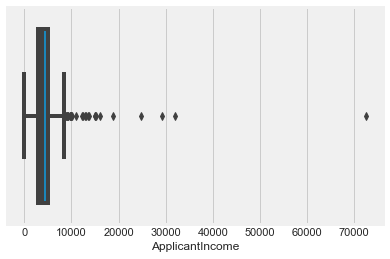

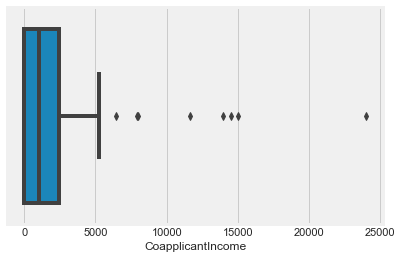

In [122]:
splot_cols=df_test_copy.columns
for i in splot_cols:
    if df_test_copy[i].dtype != 'object' and df_test_copy[i].isnull().values.any() != True:
        sns.boxplot(df_test_copy[i])
        plt.show()

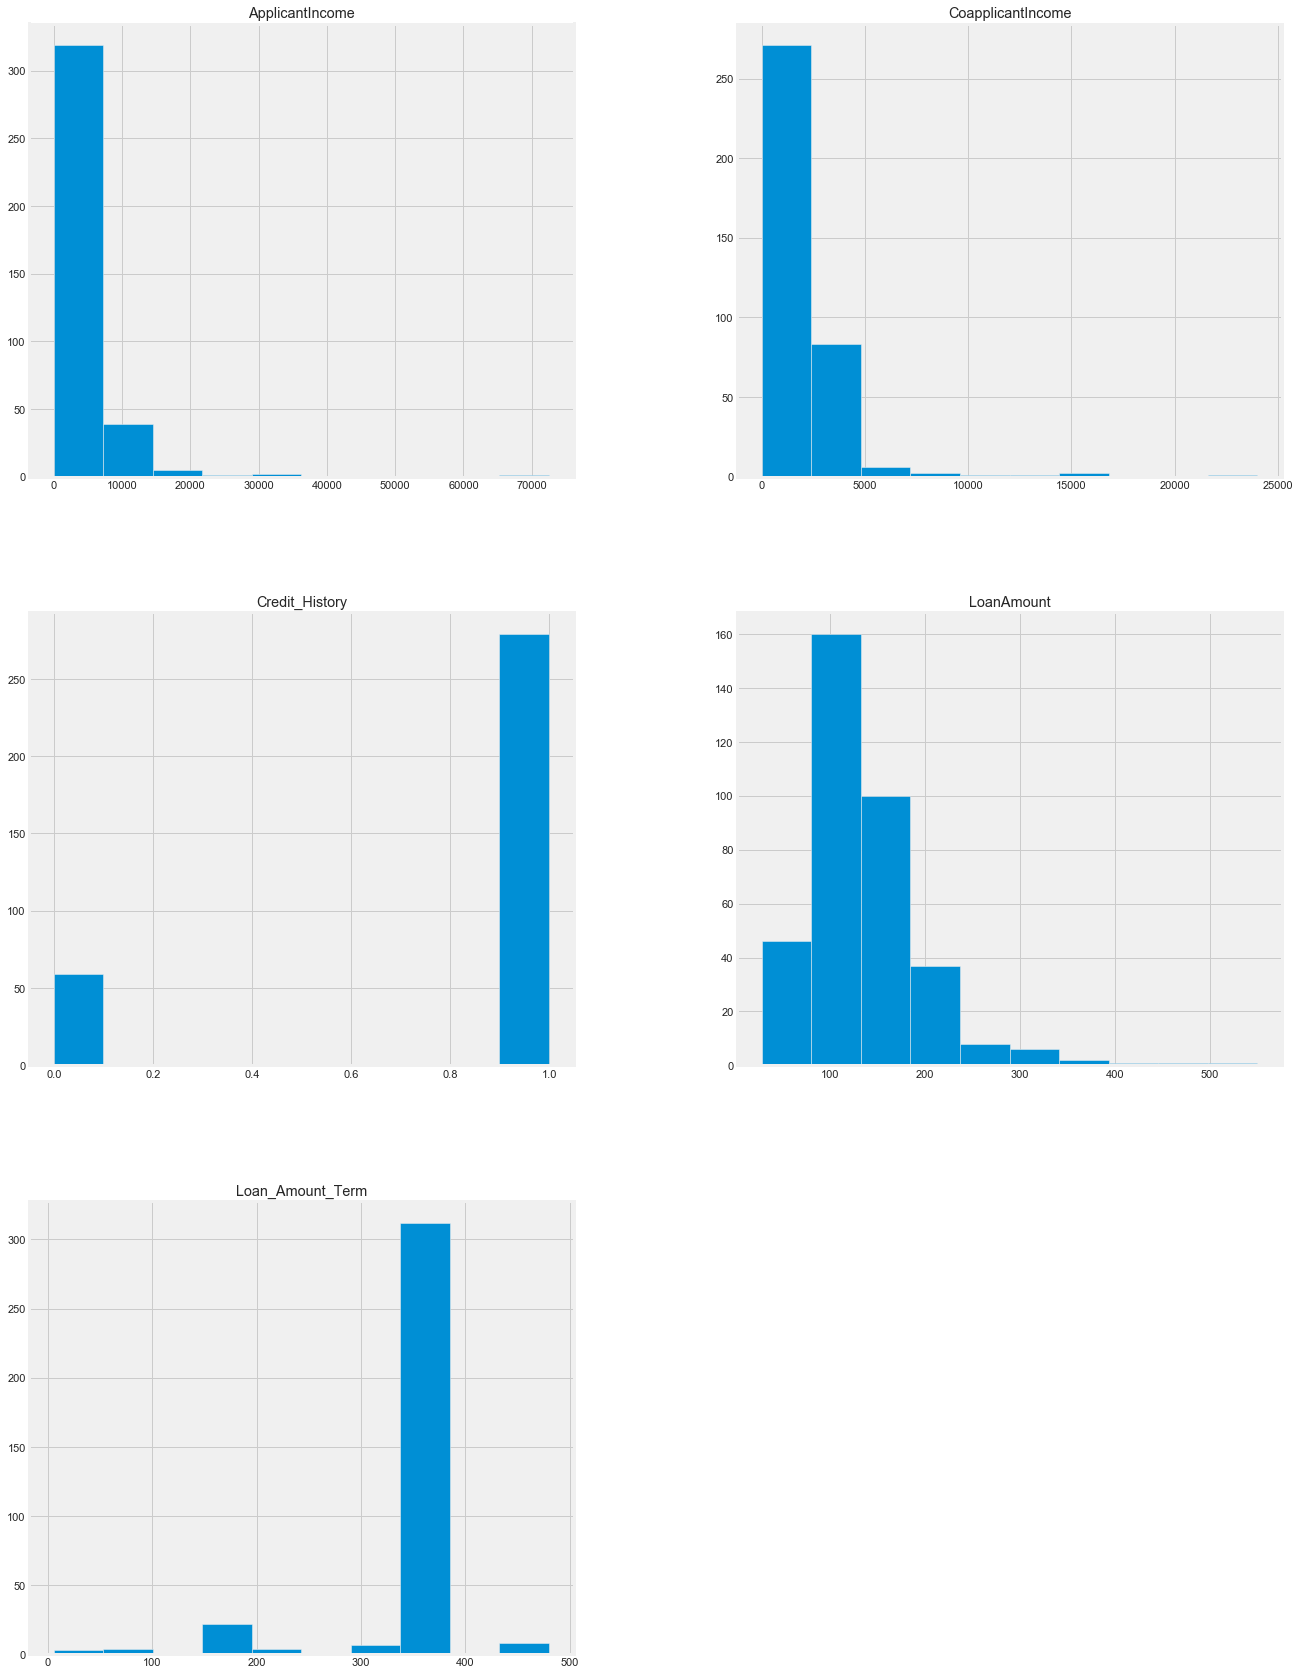

In [123]:
df_test_copy.hist(figsize=(20,30));

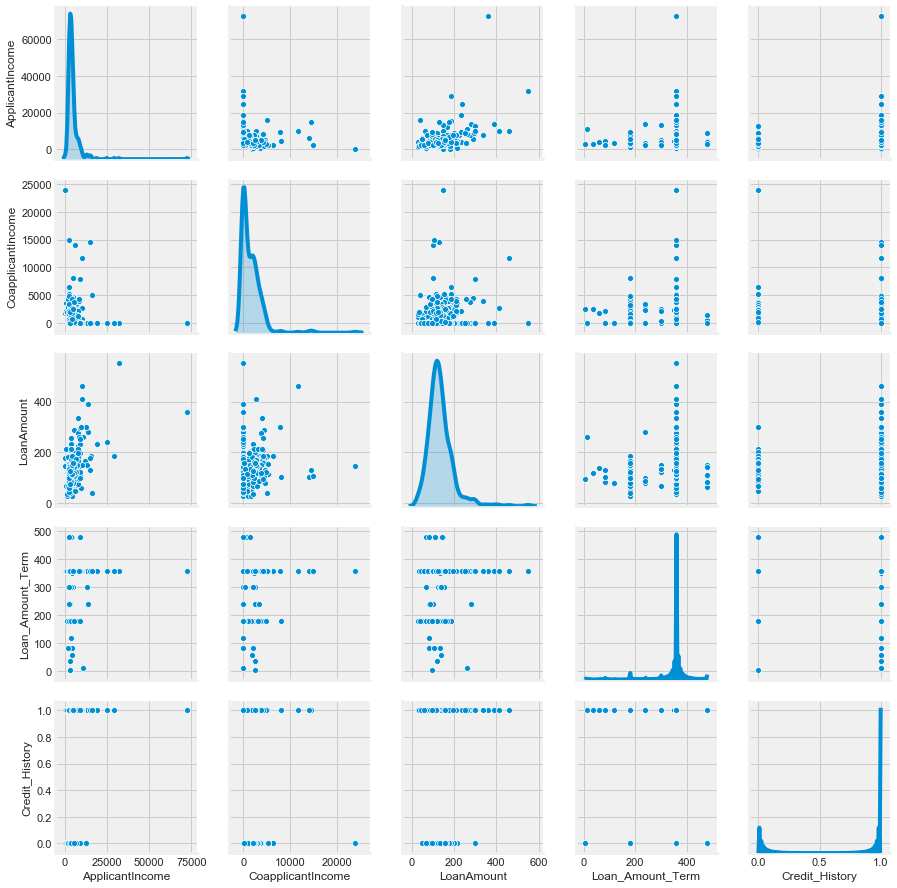

In [124]:
sns.pairplot(df_test_copy,diag_kind='kde',palette="tab10")

In [125]:
df_test_copy.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.110335,0.493451,0.023249,0.099553
CoapplicantIncome,-0.110335,1.000000,0.150850,-0.010984,-0.071235
LoanAmount,0.493451,0.150850,1.000000,0.094950,-0.012578
Loan_Amount_Term,0.023249,-0.010984,0.094950,1.000000,-0.053593
Credit_History,0.099553,-0.071235,-0.012578,-0.053593,1.000000


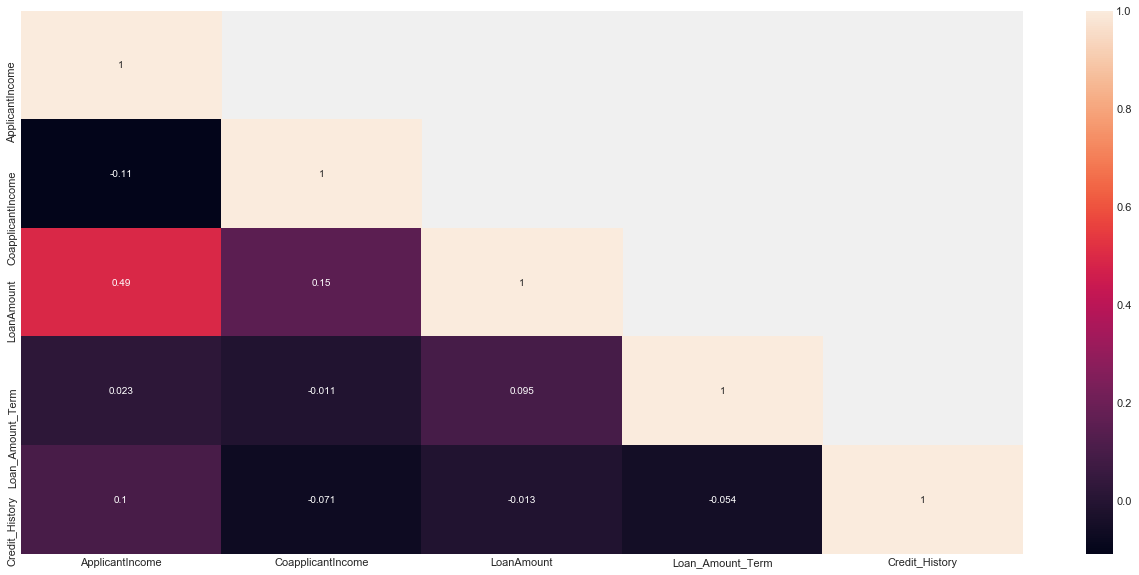

In [126]:
plt.figure(figsize=(20,10)) 
sns.heatmap(df_test_copy.corr(), annot=True,mask=np.triu(df_test_copy.corr(),+1))

In [127]:
for column in df_test_copy.columns:
    if df_test_copy[column].dtype != 'object':
        median = df_test_copy[column].median()
        df_test_copy[column] = df_test_copy[column].fillna(median)    
        
df_test_copy.isnull().sum() 

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

In [128]:
for column in df_test_copy:
    if df_test_copy[column].dtype == 'object':
        if df_test_copy[column].isnull().any():
                df_test_copy[column]=df_test[column].fillna(df_test_copy[column].mode()[0])
df_test_copy.isnull().sum() 

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [129]:
df_cat_test = df_test_copy.select_dtypes(include = ['object'])
df_num_test = df_test_copy.select_dtypes(include = ['float64','int64'])

In [130]:
df_cat_test = pd.get_dummies(df_cat_test, drop_first = True)
df_cat_test.head()

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1,1,0,0,0,0,0,0,1
1,1,1,1,0,0,0,0,0,1
2,1,1,0,1,0,0,0,0,1
3,1,1,0,1,0,0,0,0,1
4,1,0,0,0,0,1,0,0,1


In [131]:
df_test_copy = pd.concat([df_cat_test,df_num_test],axis=1)
df_test_copy.head()

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,1,0,0,0,0,0,0,1,5720,0,110.0,360.0,1.0
1,1,1,1,0,0,0,0,0,1,3076,1500,126.0,360.0,1.0
2,1,1,0,1,0,0,0,0,1,5000,1800,208.0,360.0,1.0
3,1,1,0,1,0,0,0,0,1,2340,2546,100.0,360.0,1.0
4,1,0,0,0,0,1,0,0,1,3276,0,78.0,360.0,1.0


In [132]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_test_scaled = scaler.fit_transform(df_test_copy.to_numpy())
df_test_scaled = pd.DataFrame(df_test_scaled, columns=[df_test_copy.columns])
df_test_scaled.head()

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.078865,0.000000,0.157088,0.746835,1.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.042411,0.062500,0.187739,0.746835,1.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.068938,0.075000,0.344828,0.746835,1.0
3,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.032263,0.106083,0.137931,0.746835,1.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.045168,0.000000,0.095785,0.746835,1.0


In [165]:
final_predictions = NNH_wgs.predict(df_test_scaled)
submission=pd.DataFrame([test_file_ids,final_predictions]).T
submission["Unnamed 0"] = submission["Unnamed 0"].replace([1],'Y')
submission["Unnamed 0"] = submission["Unnamed 0"].replace([0],'N')
submission.rename(columns={"Unnamed 0": "Loan_Status"},inplace=True)
submission.to_csv('submission.csv',index = False)

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [1]:
vals =[0,5,3,9,10]
for i in vals:
    if i%2==0:
        print(i,sep="x",end=" ")
    else:
        print(i,end="+")

0 5+3+9+10 

In [2]:
d = {0: 'a', 1:'b', 2:'c'}
for x in d.values():
    print(x,end="")

abc

In [3]:
A = ['a', 'b', 'c', 'd', 'e']
B = [1, 2, 3, 4, 5]
dictionary = { keys:values for keys, values in zip(A, B)}
print(dictionary)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5}


In [4]:
s='hello'

vo=['a','e','i','o','u']

In [5]:
s = {1, 2, 3, 1, 3, 4, 2, 1, 2}
print(len(s))

4
